<a href="https://colab.research.google.com/github/gstripling00/conferences/blob/main/end_spaCy_sentiment_analysispynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Named Entity Recogniation using spaCy

#NER and Sentiment Analysis

This next exercise includes NER, Sentiment Analysis, and tokenization (built in)

##Install libraries

In [1]:
#!pip install textblob
import spacy
from textblob import TextBlob


## Load the spaCy English model

In [2]:
# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Define the path to the file containing feedback
file_path = "/content/feedback_data.txt"

# Read feedback from the file
with open(file_path, "r", encoding="utf-8") as file:
    feedback_data = file.readlines()

# Process and analyze each feedback
for idx, narrative in enumerate(feedback_data, start=1):
    print(f"\nProcessing Feedback {idx}:")
    print("------------------------------")
    print(narrative.strip())

    # Process the narrative using spaCy
    doc = nlp(narrative)

    # Perform sentiment analysis using TextBlob
    blob = TextBlob(narrative)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    print(f"Sentiment: {sentiment_polarity} (Polarity), {sentiment_subjectivity} (Subjectivity)")

    # Extract named entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    print("Named Entities:", entities)

    # Determine the preferred contact method
    preferred_contact_method = "chat" if "email" not in narrative.lower() else "email"
    print(f"Preferred Contact Method: {preferred_contact_method}")



Processing Feedback 1:
------------------------------
Your products are excellent. I really love the quality! However, delivery to my location in Los Angeles was a bit slow. abbey@email.com
Sentiment: 0.44166666666666665 (Polarity), 0.6666666666666666 (Subjectivity)
Named Entities: [('Los Angeles', 'GPE')]
Preferred Contact Method: email

Processing Feedback 2:
------------------------------
The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment: 0.13636363636363635 (Polarity), 0.45454545454545453 (Subjectivity)
Named Entities: [('New York', 'GPE')]
Preferred Contact Method: email

Processing Feedback 3:
------------------------------
The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment: 0.48409090909090907 (Polarity), 0.7511363636363636 (Subjectivity)
Named Entities: [('San Francisco', 'GPE')]
Preferred Contact Method: chat

Processing F

#Add Code to output feedback results to a CSV file

In [ ]:
import spacy
from textblob import TextBlob
import csv

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Define the path to the file containing feedback
input_file_path = "/content/feedback_data.txt"
output_csv_path = "feedback_analysis_results.txt"

# Read feedback from the file
with open(input_file_path, "r", encoding="utf-8") as file:
    feedback_data = file.readlines()

# Prepare CSV header
csv_header = ["Feedback Index", "Sentiment Polarity", "Sentiment Subjectivity", "Named Entities", "Preferred Contact Method"]

# Open CSV file for writing
with open(output_csv_path, "w", newline="", encoding="utf-8") as csv_file:
    # Create CSV writer
    csv_writer = csv.writer(csv_file)

    # Write the header
    csv_writer.writerow(csv_header)

    # Process and analyze each feedback
    #for idx, narrative in enumerate(feedback_data, start=1):

  # Process and analyze each feedback
    for idx, narrative in enumerate(feedback_data, start=1):
      print(f"\nProcessing Feedback {idx}:")
      print("------------------------------")
      print(narrative.strip())

        # Process the narrative using spaCy
      doc = nlp(narrative)

        # Perform sentiment analysis using TextBlob
      blob = TextBlob(narrative)
      sentiment_polarity = blob.sentiment.polarity
      sentiment_subjectivity = blob.sentiment.subjectivity
      print(f"Sentiment: {sentiment_polarity} (Polarity), {sentiment_subjectivity} (Subjectivity)")


        # Extract named entities
      entities = [(ent.text, ent.label_) for ent in doc.ents]
      print("Named Entities:", entities)

        # Determine the preferred contact method
      preferred_contact_method = "chat" if "email" not in narrative.lower() else "email"
      print(f"Preferred Contact Method: {preferred_contact_method}")

        # Write the results to the CSV file
      csv_writer.writerow([idx, sentiment_polarity, sentiment_subjectivity, entities, preferred_contact_method])



Processing Feedback 1:
------------------------------
Your products are excellent. I really love the quality! However, delivery to my location in Los Angeles was a bit slow. abbey@email.com
Sentiment: 0.44166666666666665 (Polarity), 0.6666666666666666 (Subjectivity)
Named Entities: [('Los Angeles', 'GPE')]
Preferred Contact Method: email

Processing Feedback 2:
------------------------------
The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment: 0.13636363636363635 (Polarity), 0.45454545454545453 (Subjectivity)
Named Entities: [('New York', 'GPE')]
Preferred Contact Method: email

Processing Feedback 3:
------------------------------
The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment: 0.48409090909090907 (Polarity), 0.7511363636363636 (Subjectivity)
Named Entities: [('San Francisco', 'GPE')]
Preferred Contact Method: chat

Processing F

#Visualize Output Data

Bring data into a Pandas Dataframe

In [ ]:
import pandas as pd

# Define the path to the CSV file
csv_file_path = "/content/feedback_analysis_results.txt"

# Load data into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


   Feedback Index  Sentiment Polarity  Sentiment Subjectivity  \
0               1            0.441667                0.666667   
1               2            0.136364                0.454545   
2               3            0.484091                0.751136   
3               4           -0.750000                0.750000   

               Named Entities Preferred Contact Method  
0    [('Los Angeles', 'GPE')]                    email  
1       [('New York', 'GPE')]                    email  
2  [('San Francisco', 'GPE')]                     chat  
3        [('Chicago', 'GPE')]                    email  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Feedback Index            4 non-null      int64  
 1   Sentiment Polarity        4 non-null      float64
 2   Sentiment Subjectivity    4 non-null      float64
 3   Named Entities            4 non-null      object 
 4   Preferred Contact Method  4 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 288.0+ bytes


In [ ]:
df.head()

,Feedback Index,Sentiment Polarity,Sentiment Subjectivity,Named Entities,Preferred Contact Method
0,1,0.441667,0.666667,"[('Los Angeles', 'GPE')]",email
1,2,0.136364,0.454545,"[('New York', 'GPE')]",email
2,3,0.484091,0.751136,"[('San Francisco', 'GPE')]",chat
3,4,-0.750000,0.750000,"[('Chicago', 'GPE')]",email


In [ ]:
df.describe()

,Feedback Index,Sentiment Polarity,Sentiment Subjectivity
count,4.000000,4.000000,4.000000
mean,2.500000,0.078030,0.655587
std,1.290994,0.573339,0.139743
min,1.000000,-0.750000,0.454545
25%,1.750000,-0.085227,0.613636
50%,2.500000,0.289015,0.708333
75%,3.250000,0.452273,0.750284
max,4.000000,0.484091,0.751136


In [ ]:
import seaborn as sns

# Visualize using spaCY


Visualizing spaCy outputs often involves leveraging the built-in visualization capabilities provided by spaCy. The library offers a convenient displacy module for visualizing named entities and dependencies. Below is an example of how you can visualize spaCy's named entity recognition (NER) results:

In [ ]:
import spacy
from spacy import displacy

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Define a sample text
text = "Your products are very good. However, delivery to my location in New York was a problem. Should I use chat or email to contact you regarding my customer experience?"

# Process the text using spaCy
doc = nlp(text)

# Visualize named entities
displacy.render(doc, style="ent", jupyter=True)


In [ ]:
# Visualize dependency parse tree
displacy.render(doc, style="dep", jupyter=True)


In [ ]:
import spacy
from spacy import displacy

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Define the path to the file containing text
file_path = "/content/feedback_data.txt"

# Read text from the file
with open(file_path, "r", encoding="utf-8") as file:
    text = file.read()

# Process the text using spaCy
doc = nlp(text)

# Visualize named entities
displacy.render(doc, style="ent", jupyter=True)
displacy.render(doc, style="dep", jupyter=True)



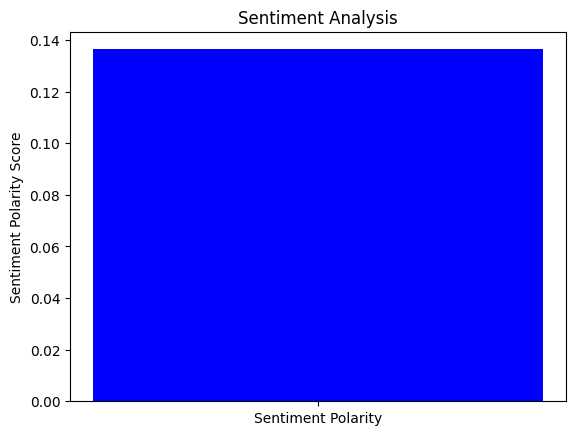

In [ ]:
import spacy
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Define the path to the file containing text
file_path = "/content/feedback_analysis_results.txt"

# Read text from the file
with open(file_path, "r", encoding="utf-8") as file:
    text = file.read()

# Process the text using spaCy
doc = nlp(text)

# Perform sentiment analysis using TextBlob
blob = TextBlob(text)
sentiment_polarity = blob.sentiment.polarity

# Visualize sentiment score
plt.bar(["Sentiment Polarity"], [sentiment_polarity], color='blue')
plt.title("Sentiment Analysis")
plt.ylabel("Sentiment Polarity Score")
plt.show()
